### Ch7 Figure1

In [1]:
# Let's say the Knowledge Explorer wants to see a summary of all the men and women who shop on their running shoe website. They want to show a breakdown by age groups. The data analyst might ask about the age brackets. They could create one every five years or every ten years. If they create one every five years then you could have eighteen or nineteen brackets. They’ll also probably be skewed in the middle. There are probably fewer runners younger than eighteen and older than ninety. 

data = []
shoe = ['lightweight trainer', 'cross-trainer', 'trail', 'stability', 'cushioned stability', 'neutral', 'motion control', 'walking', 'racing']

for i in range(3000):
    
    if rd.random() < .7:
        age = rd.randint(18,90)
    else:
        age = rd.randint(0,100)
    
    if rd.random() <= .8:
        shoe_type = 'stability'
    else:
        shoe_type = shoe[rd.choice([0,1,2,5,6,8])]
    
    if age <= 21:
        if rd.random() < .4:
            shoe_type = 'lightweight trainer'
        else:
            shoe_type = shoe[rd.choice([0,1,2,5,6,7,8])]
    if age >= 65:
        if rd.random() < .4:
            shoe_type='neutral'
        else:
            shoe_type = shoe[rd.choice([0,1,3,4,7])]
    if age >= 90:
        if rd.random() > .9:
            shoe_type = 'cross-trainer'
        else:
            shoe_type = shoe[rd.choice([0,1,3,4,7])]
    
    data.append([i, shoe_type, age])

df = pd.DataFrame(data, columns = ['id', 'type', 'age'])
# df.to_csv('csv_output/ch7_fig2.csv', index=False)
df = pd.read_csv('csv_output/ch7_fig2.csv')
df.head()

,id,type,age
0,0,stability,26
1,1,neutral,74
2,2,stability,51
3,3,neutral,82
4,4,cushioned stability,89


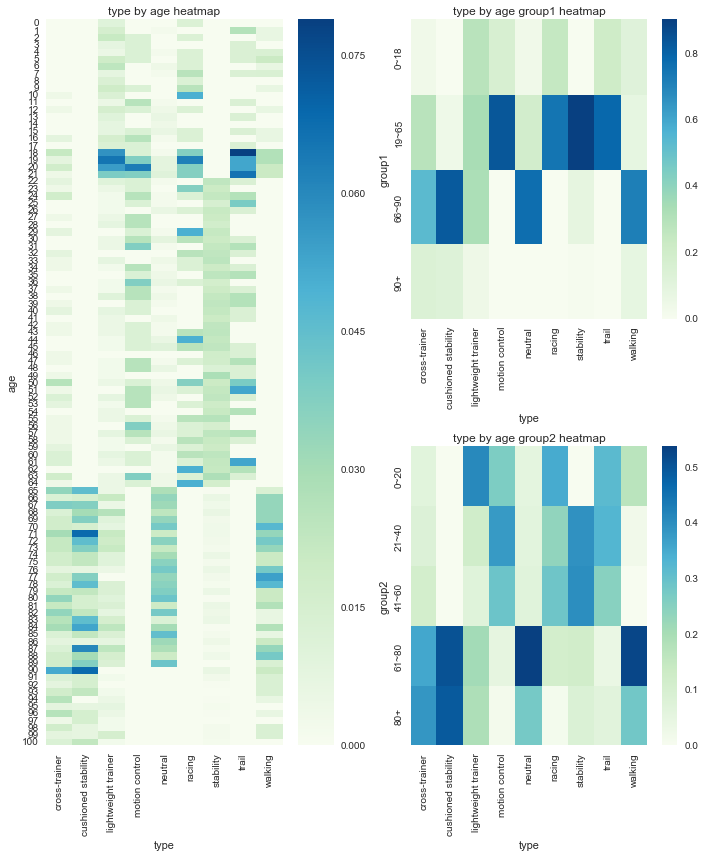

In [2]:
df = pd.read_csv('csv_output/ch7_fig2.csv')

type_age_count = df.groupby(['type', 'age']).id.count().reset_index()

df2 = pd.pivot_table(type_age_count, values='id', columns='type', index='age').fillna(0)

%matplotlib inline
sns.set_style("whitegrid")
f, ax = plt.subplots(2,2, figsize=(10,12))
ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)

sns.heatmap(df2/df2.sum(), ax=ax1, cmap='GnBu');
ax1.set_title('type by age heatmap');

def set_group1(x):
    # group1 = ['0~18', '19~65', '66~90', '90+']
    
    if x <= 18:
        return '0~18'
    elif 18<x<=65:
        return '19~65'
    elif 65<x<=90:
        return '66~90'
    else:
        return '90+'

def set_group2(x):
    # group2 = ['0~20', '21~40', '41~60', '61~80', '80+']
    
    if x <= 20:
        return '0~20'
    elif 20<x<=40:
        return '21~40'
    elif 41<x<=60:
        return '41~60'
    elif 61<x<=80:
        return '61~80'
    else:
        return '80+'
    
df['group1'] = df.age.apply(set_group1);
group1_count = df.groupby(['type', 'group1']).id.count().reset_index()
df3 = pd.pivot_table(group1_count, values='id', columns='type', index='group1').fillna(0)

sns.heatmap(df3/df3.sum(), ax=ax[0][1], cmap='GnBu');
ax[0][1].set_title('type by age group1 heatmap');

df['group2'] = df.age.apply(set_group2);
group1_count = df.groupby(['type', 'group2']).id.count().reset_index()
df4 = pd.pivot_table(group1_count, values='id', columns='type', index='group2').fillna(0)

sns.heatmap(df4/df4.sum(), ax=ax[1][1], cmap='GnBu');
ax[1][1].set_title('type by age group2 heatmap');

f.tight_layout()
f.savefig('svg_output/ch7_fig2.svg', format='svg')

Looking at the heatmap of the most granular level (each age as a cell)  and heatmaps of different age grouping: The left one shows lightweight trainer are most popular around 18~21, motion control, racing, stability and trail are more popular for age 21~65. However, because of different the age cutoffs, on the right, it might carry a very different message. For the upper right, it seems that lightweight trainers are equally popular in all three age buckets (0~18, 19~65, 66~90) but looking at the bottom right, and the original one, it's clearly more popular among only 18~21. This is because the first bucket on the upper right divide the most popular range right in half.

In [3]:
%load_ext rpy2.ipython

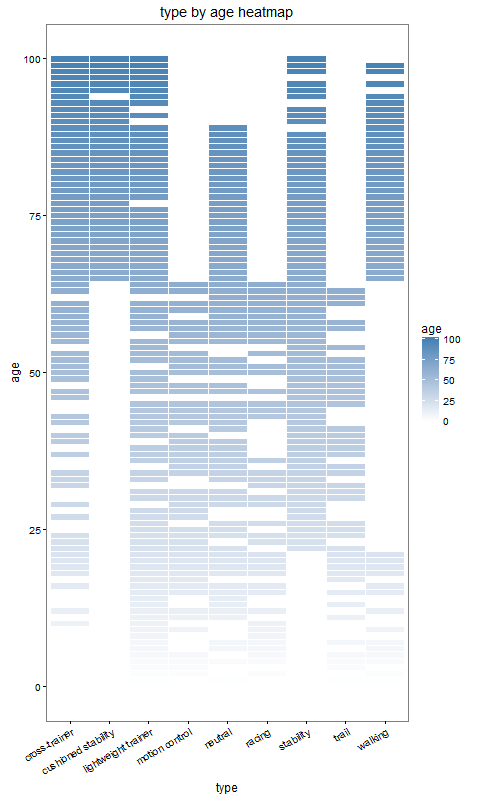

In [4]:
%%R -w 480 -h 800 -u px

df = read.csv('csv_output/ch7_fig2.csv')
head(df)

require(ggplot2)
ggplot(df, aes(type, age)) + geom_tile(aes(fill = age), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") + ggtitle('type by age heatmap') + theme_bw() + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text.x = element_text(angle = 30, hjust= 1))
# ggsave("svg_output/ch7_fig2_R.svg")